<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [141]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml
import csv
from bs4 import BeautifulSoup

arquivo_xml = '/content/Profissao Analista de dados M13 Exercicio original.xml'

with open(arquivo_xml, 'r') as arquivo:
    fonte = BeautifulSoup(arquivo, 'xml')

In [142]:
# visualize os resultados
display(fonte)

<?xml version="1.0" encoding="utf-8"?>
<ESTADOS>
<ESTADO>
<ID>1</ID>
<NOME>ACRE</NOME>
<IDCAPITAL>16</IDCAPITAL>
<SIGLA>AC</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>2</ID>
<NOME>ALAGOAS</NOME>
<IDCAPITAL>68</IDCAPITAL>
<SIGLA>AL</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>3</ID>
<NOME>AMAPA</NOME>
<IDCAPITAL>131</IDCAPITAL>
<SIGLA>AP</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>4</ID>
<NOME>AMAZONAS</NOME>
<IDCAPITAL>178</IDCAPITAL>
<SIGLA>AM</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>5</ID>
<NOME>BAHIA</NOME>
<IDCAPITAL>536</IDCAPITAL>
<SIGLA>BA</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>6</ID>
<NOME>CEARA</NOME>
<IDCAPITAL>676</IDCAPITAL>
<SIGLA>CE</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>7</ID>
<NOME>DISTRITO FEDERAL</NOME>
<IDCAPITAL>916</IDCAPITAL>
<SIGLA>DF</SIGLA>
<REGIAO>CENTRO-OESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>8</ID>
<NOME>ESPIRITO SANTO</NOME>
<IDCAPITAL>879</IDCAPITAL>
<SIGLA>ES</SIGLA>
<REGIAO>SU

In [143]:
# manipule os dados
estados = [['Estado', 'Sigla', 'Região']]
for estado in fonte.find_all('ESTADO'):
    nome = estado.find('NOME').text
    sigla = estado.find('SIGLA').text
    regiao = estado.find('REGIAO').text
    estados.append([nome, sigla, regiao])
    display(f'Estado: {nome} - Sigla: {sigla} - Região: {regiao}')

'Estado: ACRE - Sigla: AC - Região: NORTE'

'Estado: ALAGOAS - Sigla: AL - Região: NORDESTE'

'Estado: AMAPA - Sigla: AP - Região: NORTE'

'Estado: AMAZONAS - Sigla: AM - Região: NORTE'

'Estado: BAHIA - Sigla: BA - Região: NORDESTE'

'Estado: CEARA - Sigla: CE - Região: NORDESTE'

'Estado: DISTRITO FEDERAL - Sigla: DF - Região: CENTRO-OESTE'

'Estado: ESPIRITO SANTO - Sigla: ES - Região: SUDESTE'

'Estado: GOIAS - Sigla: GO - Região: CENTRO-OESTE'

'Estado: MARANHAO - Sigla: MA - Região: NORDESTE'

'Estado: MATO GROSSO - Sigla: MT - Região: CENTRO-OESTE'

'Estado: MATO GROSSO DO SUL - Sigla: MS - Região: CENTRO-OESTE'

'Estado: PARA - Sigla: PA - Região: NORTE'

'Estado: PARAIBA - Sigla: PB - Região: NORDESTE'

'Estado: PARANA - Sigla: PR - Região: SUL'

'Estado: PERNAMBUCO - Sigla: PE - Região: NORDESTE'

'Estado: PIAUI - Sigla: PI - Região: NORDESTE'

'Estado: RIO DE JANEIRO - Sigla: RJ - Região: SUDESTE'

'Estado: RIO GRANDE DO NORTE - Sigla: RN - Região: NORDESTE'

'Estado: RIO GRANDE DO SUL - Sigla: RS - Região: SUL'

'Estado: RONDONIA - Sigla: RO - Região: NORTE'

'Estado: RORAIMA - Sigla: RR - Região: NORTE'

'Estado: SANTA CATARINA - Sigla: SC - Região: SUL'

'Estado: SAO PAULO - Sigla: SP - Região: SUDESTE'

'Estado: SERGIPE - Sigla: SE - Região: NORDESTE'

'Estado: TOCANTINS - Sigla: TO - Região: NORTE'

'Estado: MINAS GERAIS - Sigla: MG - Região: SUDESTE'

In [144]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;
import pandas as pd

estado_csv = 'estados-limpo.csv'

with open(estado_csv, 'w', encoding='utf-8', newline='') as estado_limpo:
    escritor = csv.writer(estado_limpo, delimiter=';')
    escritor.writerow(['Estado', 'Sigla', 'Região'])
    escritor.writerows(estados)

print(f'Dados escritos com sucesso em {estado_csv}')


Dados escritos com sucesso em estados-limpo.csv


### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [145]:
arquivo_csv = '/content/Profissao Analista de dados M13 Exercicio cidades-bruto.csv'
cidades_df = pd.read_csv(arquivo_csv)

In [146]:
cols = cidades_df.select_dtypes(include=[object]).columns
cidades_df[cols] = cidades_df[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))

In [147]:
# visualize os resultados
display(cidades_df)

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turucu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitoria,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUI,Nazaria,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...
...,...,...,...,...,...,...,...,...,...,...,...,...
5561,vw_pib_percapita.fid-4514e25a_17aaa325034_-eba,5254,SANTA CATARINA,Campo Ere,2010.0,1.876289e+05,9737,19269.679688,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.024131281087385 -26.361357...
5562,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb9,2749,PARANA,Planalto,2010.0,1.385535e+05,13983,9908.709961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.61882711231503 -25.6460599...
5563,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb8,3779,SAO PAULO,Guararapes,2010.0,5.320191e+05,29639,17949.970703,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-50.70271677275949 -21.0257124...
5564,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb7,617,RIO GRANDE DO SUL,Barra do Guarita,2010.0,2.198064e+04,3067,7166.819824,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-53.778785810369236 -27.152703...


In [148]:
cidades_df = cidades_df.query('Censo == 2010')[['UF', 'nome', 'Pop_est_2009', 'PIB', 'PIB_percapita']]

In [149]:
cidades_df.head(5)

,UF,nome,Pop_est_2009,PIB,PIB_percapita
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,RIO GRANDE DO SUL,Turucu,4000,4.572388e+04,11430.969727
2,ESPIRITO SANTO,Vitoria,320156,1.978263e+07,61790.589844
3,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961
4,PIAUI,Nazaria,7895,2.095138e+04,2653.750000


In [150]:
cidades_df.shape

(5555, 5)

In [151]:
cidades_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5555 entries, 0 to 5565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UF             5555 non-null   object 
 1   nome           5555 non-null   object 
 2   Pop_est_2009   5555 non-null   int64  
 3   PIB            5555 non-null   float64
 4   PIB_percapita  5555 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 260.4+ KB


In [152]:
cidades_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pop_est_2009,5555.0,34415.147795,2.019830e+05,837.000000,5337.000000,11170.000000,23231.000000,1.103759e+07
PIB,5555.0,582567.374885,6.352060e+06,5770.282227,38390.367188,80491.531250,205672.250000,3.893172e+08
PIB_percapita,5555.0,10981.193570,1.215933e+04,1929.969971,4516.020020,8391.370117,13317.935059,3.608158e+05


In [153]:
cidades = cidades_df
cidade_csv = 'cidades-limpo.csv'

with open(cidade_csv, 'w', encoding='utf-8', newline='') as cidade_limpo:
    escritor = csv.writer(cidade_limpo, delimiter=';')
    escritor.writerow(['Estado', 'Cidade', 'Pop_est_2009','PIB', 'PIB_percapita'])
    escritor.writerows(cidades.values)

print(f'Dados escritos com sucesso em {cidade_csv}')

Dados escritos com sucesso em cidades-limpo.csv


### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [154]:
estados_df = pd.read_csv('estados-limpo.csv', delimiter=';')
cidades_df = pd.read_csv('cidades-limpo.csv', delimiter=';')

brasil_df = pd.merge(left=cidades_df, right=estados_df, on='Estado', how='inner')

brasil_df.to_csv('brasil.csv', index=False)

print('Dados do Brasil combinados e salvos com sucesso em brasil.csv')

Dados do Brasil combinados e salvos com sucesso em brasil.csv


---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [155]:
# solução do exercício 2.1
brasil_df.head()

,Estado,Cidade,Pop_est_2009,PIB,PIB_percapita,Sigla,Região
0,BAHIA,Tremedal,18433,57883.992188,3140.239990,BA,NORDESTE
1,BAHIA,Maetinga,7884,23558.447266,2988.129883,BA,NORDESTE
2,BAHIA,Ibirapua,7893,74997.406250,9501.759766,BA,NORDESTE
3,BAHIA,Governador Mangabeira,20668,92903.820312,4495.060059,BA,NORDESTE
4,BAHIA,Ibitita,19410,62366.886719,3213.129883,BA,NORDESTE


### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [156]:
top_10_cidades_populosas = brasil_df[['Cidade', 'Pop_est_2009', 'Sigla', 'Região']].\
    sort_values('Pop_est_2009', ascending=False)

top_10_cidades_populosas.head(10)

,Cidade,Pop_est_2009,Sigla,Região
3271,Sao Paulo,11037593,SP,SUDESTE
4504,Rio de Janeiro,6186710,RJ,SUDESTE
44,Salvador,2998056,BA,NORDESTE
5554,Brasilia,2606885,DF,CENTRO-OESTE
4221,Fortaleza,2505552,CE,NORDESTE
1735,Belo Horizonte,2452617,MG,SUDESTE
4849,Curitiba,1851215,PR,SUL
3720,Manaus,1738641,AM,NORTE
2435,Recife,1561659,PE,NORDESTE
2624,Belem,1437600,PA,NORTE


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [157]:
# código para responder a pergunta
regiao_nordeste = brasil_df.query('Região == "NORDESTE" ')
menores_pib_nordeste = regiao_nordeste[['Cidade', 'PIB_percapita', 'Sigla']].\
    sort_values(by=['PIB_percapita'], ascending=True)

menores_pib_nordeste.head(5)

,Cidade,PIB_percapita,Sigla
4464,Sao Vicente Ferrer,1929.969971,MA
4359,Cajapio,2203.830078,MA
1848,Dom Inocencio,2358.239990,PI
4483,Timbiras,2368.159912,MA
4380,Axixa,2416.969971,MA


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [158]:
# código para responder a pergunta
estado_SP = brasil_df.query('Sigla == "SP" ')
maiores_pib_SP = estado_SP[['Cidade', 'Estado', 'PIB']].sort_values('PIB', ascending=False)

maiores_pib_SP.head(15)

,Cidade,Estado,PIB
3271,Sao Paulo,SAO PAULO,389317152.0
3223,Guarulhos,SAO PAULO,32473828.0
3340,Campinas,SAO PAULO,31654720.0
3106,Osasco,SAO PAULO,31616452.0
2810,Sao Bernardo do Campo,SAO PAULO,28935768.0
3344,Barueri,SAO PAULO,26908070.0
2768,Santos,SAO PAULO,22546134.0
2994,Sao Jose dos Campos,SAO PAULO,22018042.0
3014,Jundiai,SAO PAULO,16585137.0
2816,Santo Andre,SAO PAULO,14709603.0


 - Qual é o PIB do estado de Santa Catarina?

In [159]:
# código para responder a pergunta
estado_SC = brasil_df.query('Sigla == "SC" ')
PIB_SC = estado_SC['PIB'].mean()

print(f'PIB de SC: {PIB_SC}')

PIB de SC: 443024.7670715125


 - Qual é o população da região sul?

In [161]:
# código para responder a pergunta
regiao_sul = brasil_df.query('Região == "SUL"')
populacao_regiao_sul = regiao_sul['Pop_est_2009'].sum()

print(f'População da região Sul em 2009: {populacao_regiao_sul} pessoas')

População da região Sul em 2009: 27719118 pessoas


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [162]:
# código para responder a pergunta
cidades_MS = brasil_df.query('Sigla == "MS"')
pib_percapita_medio_cidades_MS = cidades_MS['PIB_percapita'].mean()

print(f'PIB per capita médio das cidades do Mato Grosso do Sul: {pib_percapita_medio_cidades_MS}')

PIB per capita médio das cidades do Mato Grosso do Sul: 14458.896859975644


 - Qual é a população do Brasil?

In [163]:
# código para responder a pergunta
populacao_BR = brasil_df['Pop_est_2009'].sum()

print(f'População do Brasil: {populacao_BR} pessoas')

População do Brasil: 191176146 pessoas


### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

<ipython-input-177-9334dc6d179e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


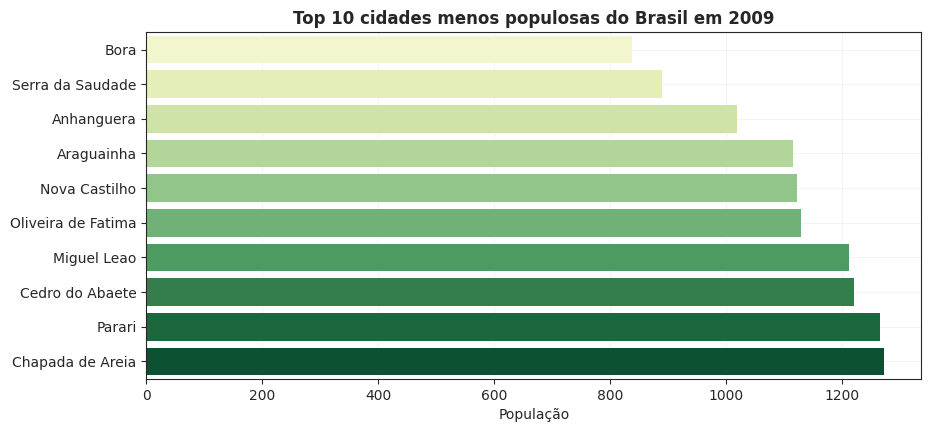

In [177]:
# código para gerar a visualização
import matplotlib.pyplot as plt
import seaborn as sns

cidades_menos_populosas_BR = brasil_df[['Cidade', 'Pop_est_2009']].\
    sort_values('Pop_est_2009', ascending=True).head(10)

with sns.axes_style('ticks'):
  fig, ax = plt.subplots(figsize=(10,4.5))
  sns.barplot(
      data = cidades_menos_populosas_BR,
      x = 'Pop_est_2009',
      y = 'Cidade',
      palette = 'YlGn',
      lw=0
  )
  plt.grid(alpha=0.2)
  plt.title('Top 10 cidades menos populosas do Brasil em 2009', weight='bold', size=12)
  plt.xlabel('População', size=10)
  plt.ylabel('')

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

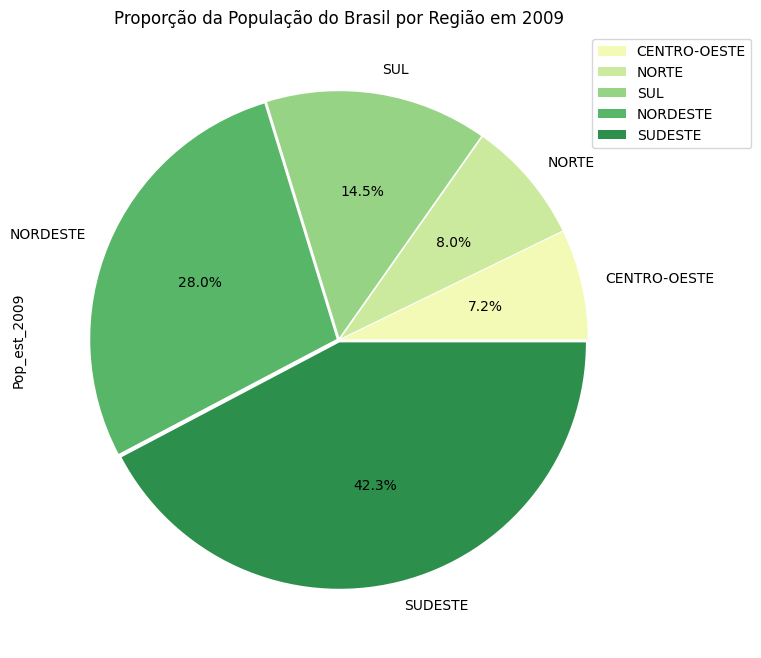

In [181]:
# código para gerar a visualização
populacao_por_regiao = brasil_df[['Região', 'Pop_est_2009']].groupby('Região').sum()\
    .sort_values('Pop_est_2009', ascending=True)

palette_color = sns.color_palette('YlGn')
explode = [0.01, 0.01, 0.01, 0.01, 0.01]

populacao_por_regiao.plot.pie(y='Pop_est_2009',
                              title="Proporção da População do Brasil por Região em 2009",
                              figsize=(16,8),
                              explode = explode,
                              autopct='%1.1f%%',
                              colors=palette_color
).legend(bbox_to_anchor=(0.9, 1));
